> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [showappointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
%matplotlib inline


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df =pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#display the first five raws in the data


In [4]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

# there isn't null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe()

# problems I descovered
# age min is -ve value !
#

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df['Age'].replace({-1:1},inplace=True)


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

## we can delete some coulmns we will not need

In [9]:
df_to_del = ['AppointmentID' ,'AppointmentDay' , 'ScheduledDay' ]
df = df.drop(df_to_del ,1)


C:\Users\Blu-Ray\AppData\Local\Temp\ipykernel_17552\3247481116.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(df_to_del ,1)


In [10]:
#duplicated raws
no_of_dublicated = df.duplicated().sum()
no_of_dublicated


27964

In [11]:
# Deleting it 
df.drop_duplicates(inplace= True)

# make sure from deleting
doublicated_become = df.duplicated().sum()
#output : 0

print('there were {}  duplicates raws then deleted so, it become {} '.format(no_of_dublicated ,doublicated_become ))

there were 27964  duplicates raws then deleted so, it become 0 


In [12]:
df.shape

(82563, 11)

#### there were 27964  duplicates raws then deleted so, it become 0 


In [13]:
#check columns name
# there is no-show , let;s change - to _
df.rename(columns={'No-show' : 'No_show'} , inplace=True)
df.head(1)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [14]:
df.isnull().sum().sum()
# greate thre is not null values 

0

### There is no null values

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (How many No_show Yes vs No ? )

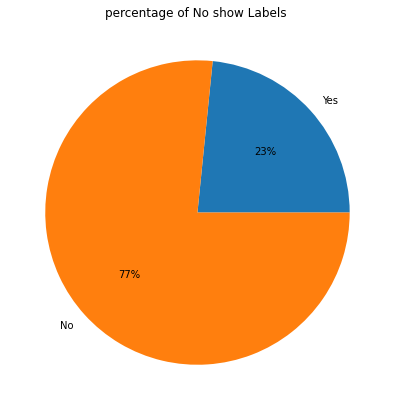

percentage of yes : 23 %
percentage of no : 77 %


In [15]:
# show the percentage between yes and no 

yes_str =str((df.No_show == 'Yes').sum())
no_str = str((df.No_show == 'No' ).sum())
yes_and_no = [yes_str , no_str]
fig = plt.figure(figsize =(7, 7))
plt.pie(yes_and_no , labels=['Yes' , 'No'] ,autopct = '%0.0f%%') 
plt.title('percentage of No show Labels ')
plt.show()

# print the percentage
yes =(df.No_show == 'Yes').sum()
no = (df.No_show == 'No' ).sum()
percent_yes = (yes / (yes+no)) * 100
percent_no = (no / (yes+no)) * 100
print ('percentage of yes : {}'.format( round(percent_yes)) , '%')
print ('percentage of no : {}'.format( round(percent_no)) , '%')


#### explore variables in histogram

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>],
       [<AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>],
       [<AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>]],
      dtype=object)

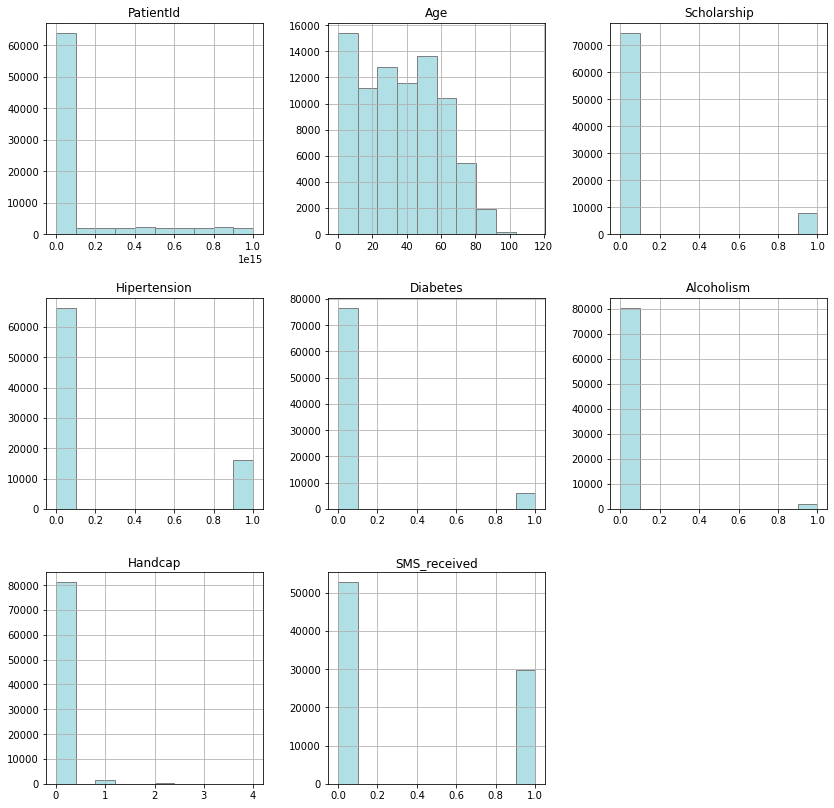

In [16]:
df.hist(figsize=(14,14),color='powderblue',edgecolor='gray')

## functions to achieve reusability and against loop

In [17]:
# this method show unstack visulization in show and no show in each columns 
def visual_unstack(column_name):
    
    plt.figure(figsize=(7,7))
    
    comp_No_show= df.groupby(column_name)["No_show"].value_counts()

    colors = sns.color_palette('rocket')
    comp_No_show.unstack().plot(kind="bar",stacked=True,figsize=(10,7),color=colors)
    plt.legend(["yes","no"]);
    plt.title("{} Comparisons in No Show".format(column_name))
    plt.ylabel('count have or no {}'.format(column_name))
    plt.show()
    

In [18]:
# this function shows the rate of yes or no in each unique value in each column 
# we will know which will affect and which is no affect
def Rate_in_Deaseases_col (column_name):
    comp_No_show= df.groupby(column_name)["No_show"].value_counts()
    df2 =comp_No_show.to_frame()
    df2.iat[0,0]
    p1 = round(df2.iat[0,0] / (df2.iat[0,0]+df2.iat[1,0])*100)
    p2 = round(df2.iat[1,0] / (df2.iat[0,0]+df2.iat[1,0])*100)
    p3 = round(df2.iat[2,0] / (df2.iat[2,0]+df2.iat[3,0])*100)
    p4 = round(df2.iat[3,0] / (df2.iat[2,0]+df2.iat[3,0])*100)

    dont_have_show =round(p1/p2, 2)
    have_show =round(p3/p4, 2)
    
    print("Rate between yes and no at people don\'t have {} ".format(column_name) ,dont_have_show)
    print("Rate between yes and no at people Have {} ".format(column_name),have_show)
    
    #visualize
    list1 = [have_show, dont_have_show]
    plt.figure(figsize=(10,7))
    plt.bar([1,2], list1, tick_label=["have disease", "not have disease"],color=['powderblue','pink'])
   
    plt.title("Rate show and no show in haveing {} or no in this ".format(column_name))
    plt.xlabel('disease')
    plt.ylabel('Rate between show and no Show')
    plt.show()

    # count the percentage of affect
    print('percentage of affect {}'.format(column_name),(round((have_show-dont_have_show)/(dont_have_show+have_show)*100 , 1)) , '%' )

## Research Question 2 (is having Diabetes affect on No_show ? )

<Figure size 504x504 with 0 Axes>

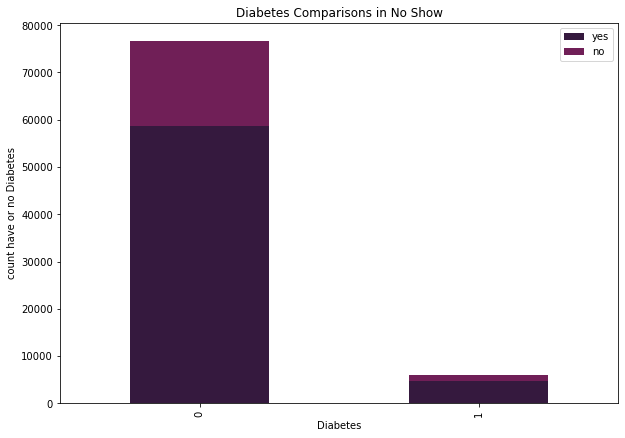

Rate between yes and no at people don't have Diabetes  3.17
Rate between yes and no at people Have Diabetes  3.76


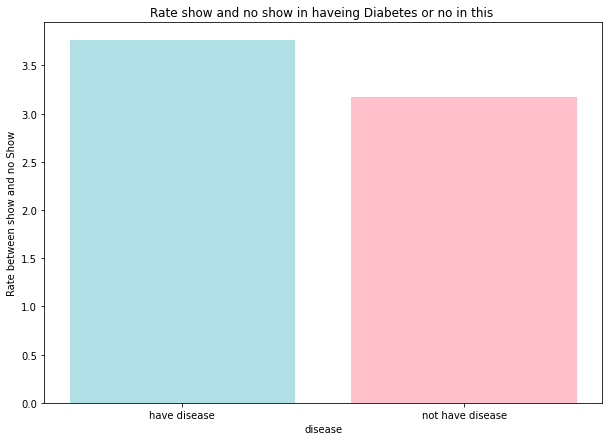

percentage of affect Diabetes 8.5 %


In [19]:
visual_unstack('Diabetes')
Rate_in_Deaseases_col('Diabetes')

### having diabets affect with 8.5%

## Research Question 2 (is having Scholarship affect on No_show ?

<Figure size 504x504 with 0 Axes>

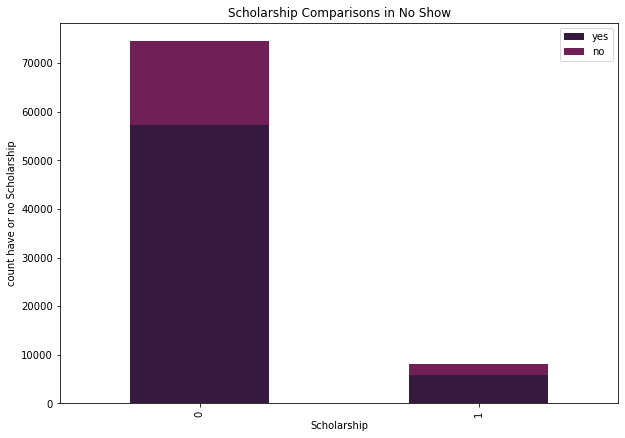

Rate between yes and no at people don't have Scholarship  3.35
Rate between yes and no at people Have Scholarship  2.7


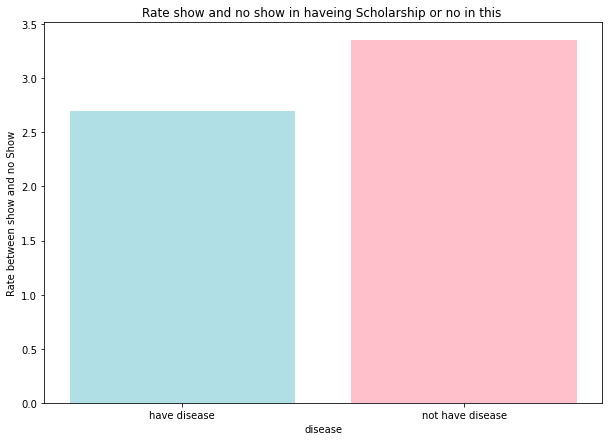

percentage of affect Scholarship -10.7 %


In [20]:
visual_unstack('Scholarship')
Rate_in_Deaseases_col('Scholarship')

### percentage of affect -10.7 %
### which mean have simple inverse affect 10.7%

## Research Question 2 (is having Hipertension affect on No_show ?

<Figure size 504x504 with 0 Axes>

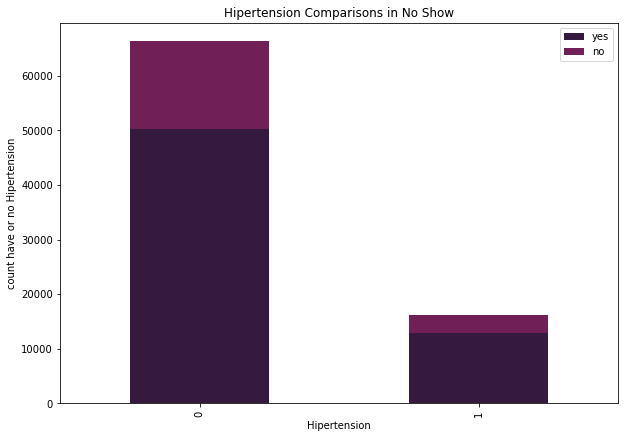

Rate between yes and no at people don't have Hipertension  3.17
Rate between yes and no at people Have Hipertension  4.0


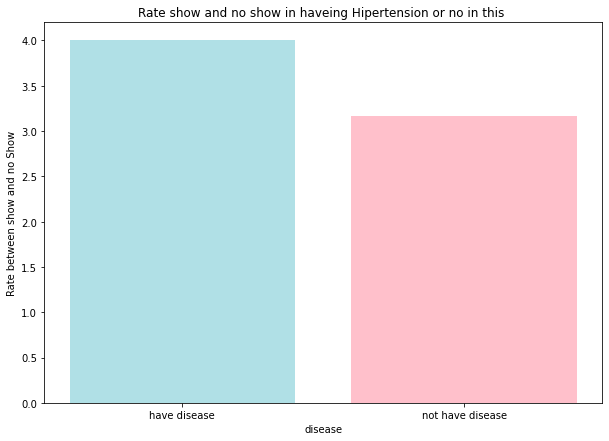

percentage of affect Hipertension 11.6 %


In [21]:
visual_unstack('Hipertension')
Rate_in_Deaseases_col('Hipertension')

### percentage of affect 11.6 % (simple affect)

## Research Question 2 (is having Alcoholism affect on No_show ?

<Figure size 504x504 with 0 Axes>

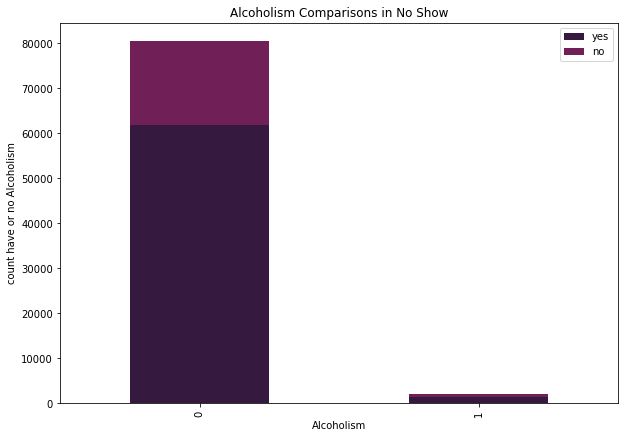

Rate between yes and no at people don't have Alcoholism  3.35
Rate between yes and no at people Have Alcoholism  2.57


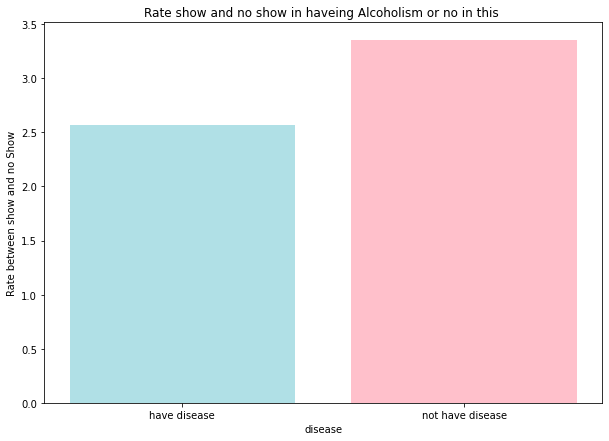

percentage of affect Alcoholism -13.2 %


In [22]:
visual_unstack('Alcoholism')
Rate_in_Deaseases_col('Alcoholism')

### percentage of affect 11.6 %


<Figure size 504x504 with 0 Axes>

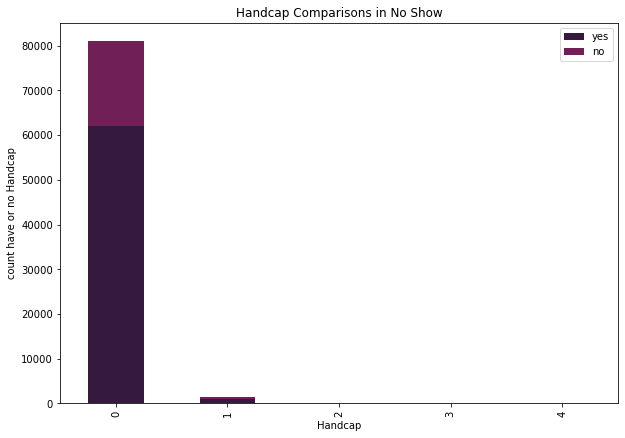

Rate between yes and no at people don't have Handcap  3.35
Rate between yes and no at people Have Handcap  4.0


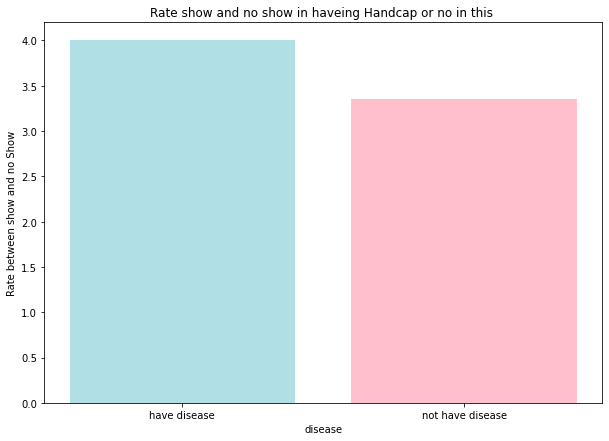

percentage of affect Handcap 8.8 %


In [23]:
visual_unstack('Handcap')
Rate_in_Deaseases_col('Handcap')

#### percentage of affectHandcap 8.8 %


## Research Question 2 (is if SMS received affect or no affect on No_show ?

<Figure size 504x504 with 0 Axes>

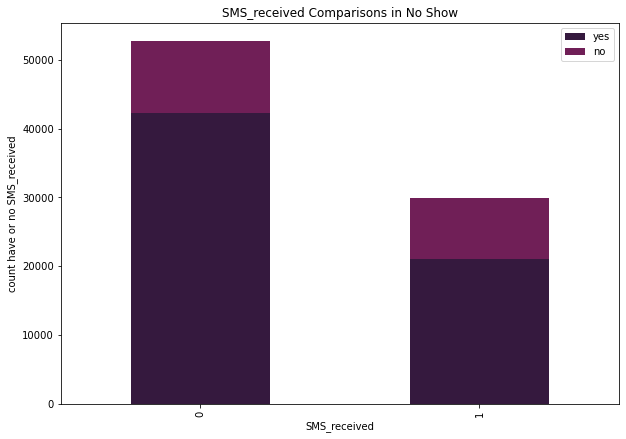

Rate between yes and no at people don't have SMS_received  4.0
Rate between yes and no at people Have SMS_received  2.33


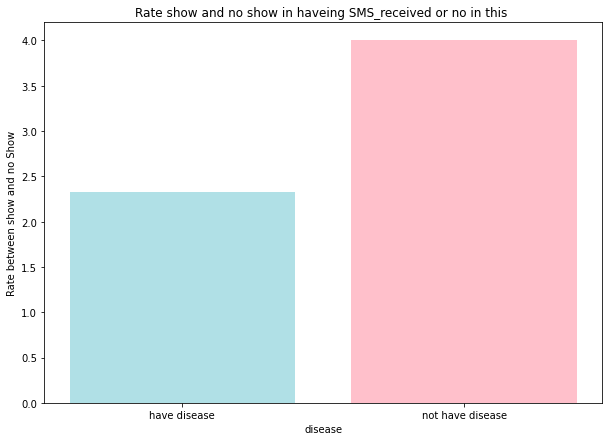

percentage of affect SMS_received -26.4 %


In [24]:
visual_unstack('SMS_received')
Rate_in_Deaseases_col('SMS_received')

#### There is big inverse affective in recieving messages ( percentage of affect -26.4 %)
#### unexpected

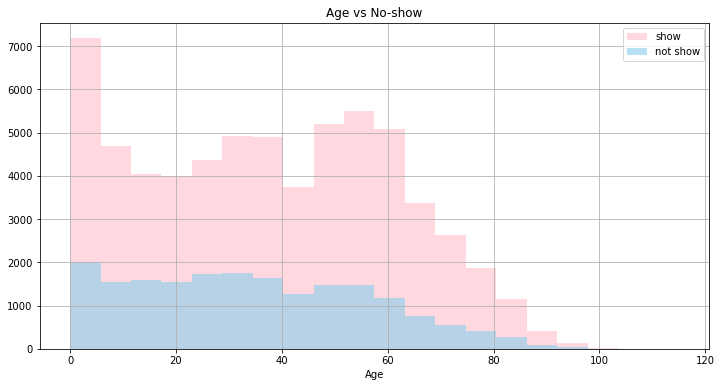

In [25]:
plt.figure(figsize=(12,6))
df[df['No_show']=='No']['Age'].hist(alpha=0.6, bins=20,label="show",color='pink')
df[df['No_show']=='Yes']['Age'].hist(alpha=0.6, bins=20,label="not show",color='skyblue')
plt.legend();
plt.title("Age vs No-show")
plt.xlabel("Age")
plt.show()

#### the most in showing up is in 1:5 , 25:35 and 50:60

## Research Question 2 (is Gender affect on No_show ? )

<Figure size 504x504 with 0 Axes>

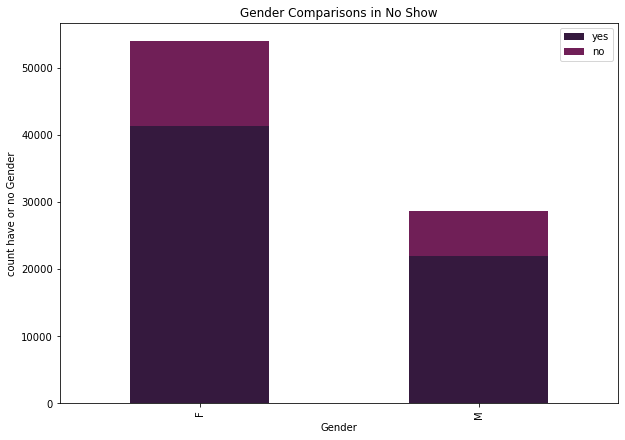

Rate between yes and no and female in Gender column  3.35
Rate between yes and no and male in Gender column  3.35


In [27]:
plt.figure(figsize=(7,7))
    
comp_No_show= df.groupby('Gender')["No_show"].value_counts()

colors = sns.color_palette('rocket')
comp_No_show.unstack().plot(kind="bar",stacked=True,figsize=(10,7),color=colors)
plt.legend(["yes","no"]);
plt.title("{} Comparisons in No Show".format('Gender'))
plt.ylabel('count have or no {}'.format('Gender'))
plt.show()
    
comp_No_show= df.groupby('Gender')["No_show"].value_counts()
df2 =comp_No_show.to_frame()
df2.iat[0,0]
p1 = round(df2.iat[0,0] / (df2.iat[0,0]+df2.iat[1,0])*100)
p2 = round(df2.iat[1,0] / (df2.iat[0,0]+df2.iat[1,0])*100)
p3 = round(df2.iat[2,0] / (df2.iat[2,0]+df2.iat[3,0])*100)
p4 = round(df2.iat[3,0] / (df2.iat[2,0]+df2.iat[3,0])*100)

females =round(p1/p2, 2)
males =round(p3/p4, 2)
    
print("Rate between yes and no and female in {} column ".format('Gender') ,females)
print("Rate between yes and no and male in {} column ".format('Gender'),males)
    
#visualize
list1 = [have_show, dont_have_show]
plt.figure(figsize=(10,7))
plt.bar([1,2], list1, tick_label=["males", "females"],color=['powderblue','pink'])
plt.title("Rate show and no show in haveing {} or no in this ".format('Gender'))
plt.xlabel('disease')
plt.ylabel('Rate between show and no Show')
plt.show()

# count the percentage of affect
print('percentage of affect of Genfer' ,(round((have_show-dont_have_show)/(dont_have_show+have_show)*100 , 1)) , '%' )

#### Gender has no affect

<a id='conclusions'></a>
# Conclusions
-----------------------

percentage of yes in No_show : 23.0 %

 Gender don't have affect in show or no

### the variables that have simple affect
 Diabetes with 8.5% , 
 Handcap with 8.8 % ,
 Hipertension with 11.6 %


### the variables that have inverse affect
 Scholarship -10.7 %
 Alcoholism -13.2 %

#### the Unexpected is SMS_received -26.4 %
 it means have that people no show although they didn't recieved was bigger than others


#### the most in showing up is in 1:5 , 25:35 and 50:60

## Limitation 
------------------------------

Neighbour I couldn't get benifit from it 

Time if it in good format with more usefull info we will know more 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])